In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

import re
import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [3]:
%matplotlib inline

데이터 다운로드 : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [4]:
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [5]:
train = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.shape

(159571, 8)

In [7]:
test = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
test.shape

(153164, 2)

In [9]:
print('train : test = ', round(train.shape[0]/(train.shape[0]+test.shape[0])*100), ' : ', \
      round(test.shape[0]/(train.shape[0]+test.shape[0])*100))

train : test =  51  :  49


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [12]:
toxic = train.iloc[:, 2:].sum().to_dict()
toxic

{'toxic': 15294,
 'severe_toxic': 1595,
 'obscene': 8449,
 'threat': 478,
 'insult': 7877,
 'identity_hate': 1405}

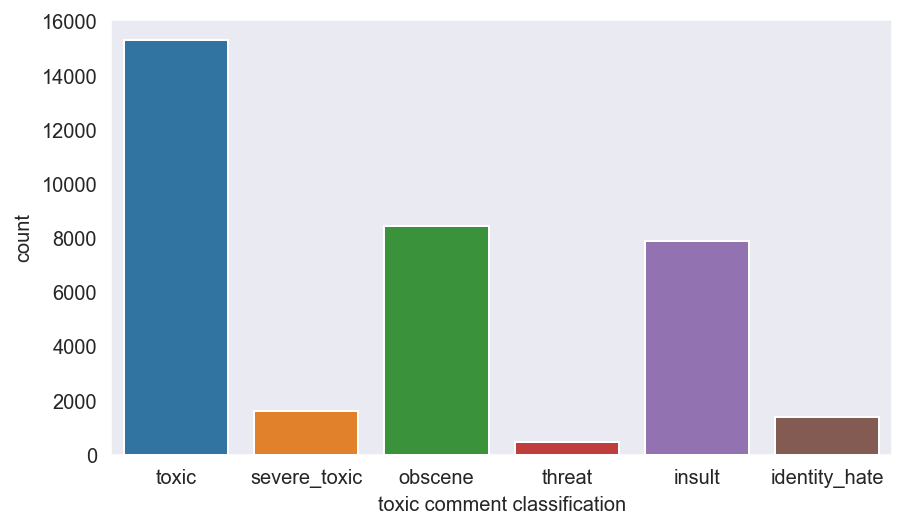

In [13]:
x = list(toxic.keys())
y = list(toxic.values())


color = sns.color_palette()
sns.set_style("dark")
plt.figure(figsize=(7,4))
plt.xlabel('toxic comment classification')
plt.ylabel('count')
sns.barplot(x, y)

In [14]:
# 독성이 아닌 댓글의 개수를 clean이라는 컬럼에 저장
rowsums = train.iloc[:,2:].sum(axis=1)
train['clean'] = (rowsums==0)

In [15]:
# 독성 단계만 모은 임시 데이터프레임
temp_df = train.iloc[:, 2:]
temp_df.head(3)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,True
2,0,0,0,0,0,0,True


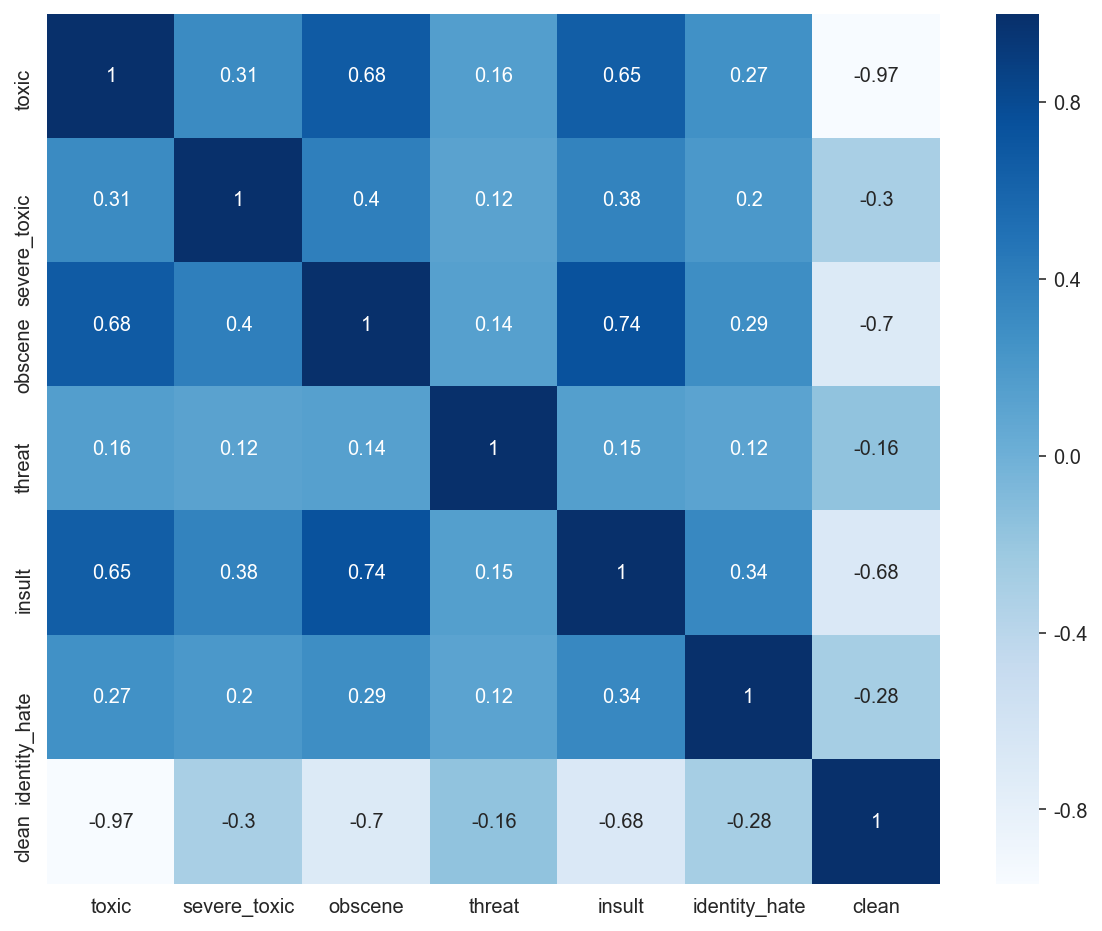

In [16]:
# 악성 댓글의 독성 끼리의 상관관계를 살펴본다.
corr = temp_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap='Blues',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

위의 그래프를 살펴보면,   
toxic과 insult 그리고 toxic과 obscene는 양의 상관관계를 가지고,  
toxic과 clean은 -0.97로 강력한 음의 상관관계를 가진다. 

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def displayWordCloud(data=None, backgroudcolor='white', width=800, height=600):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=backgroudcolor, width=width, height=height).generate(data)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

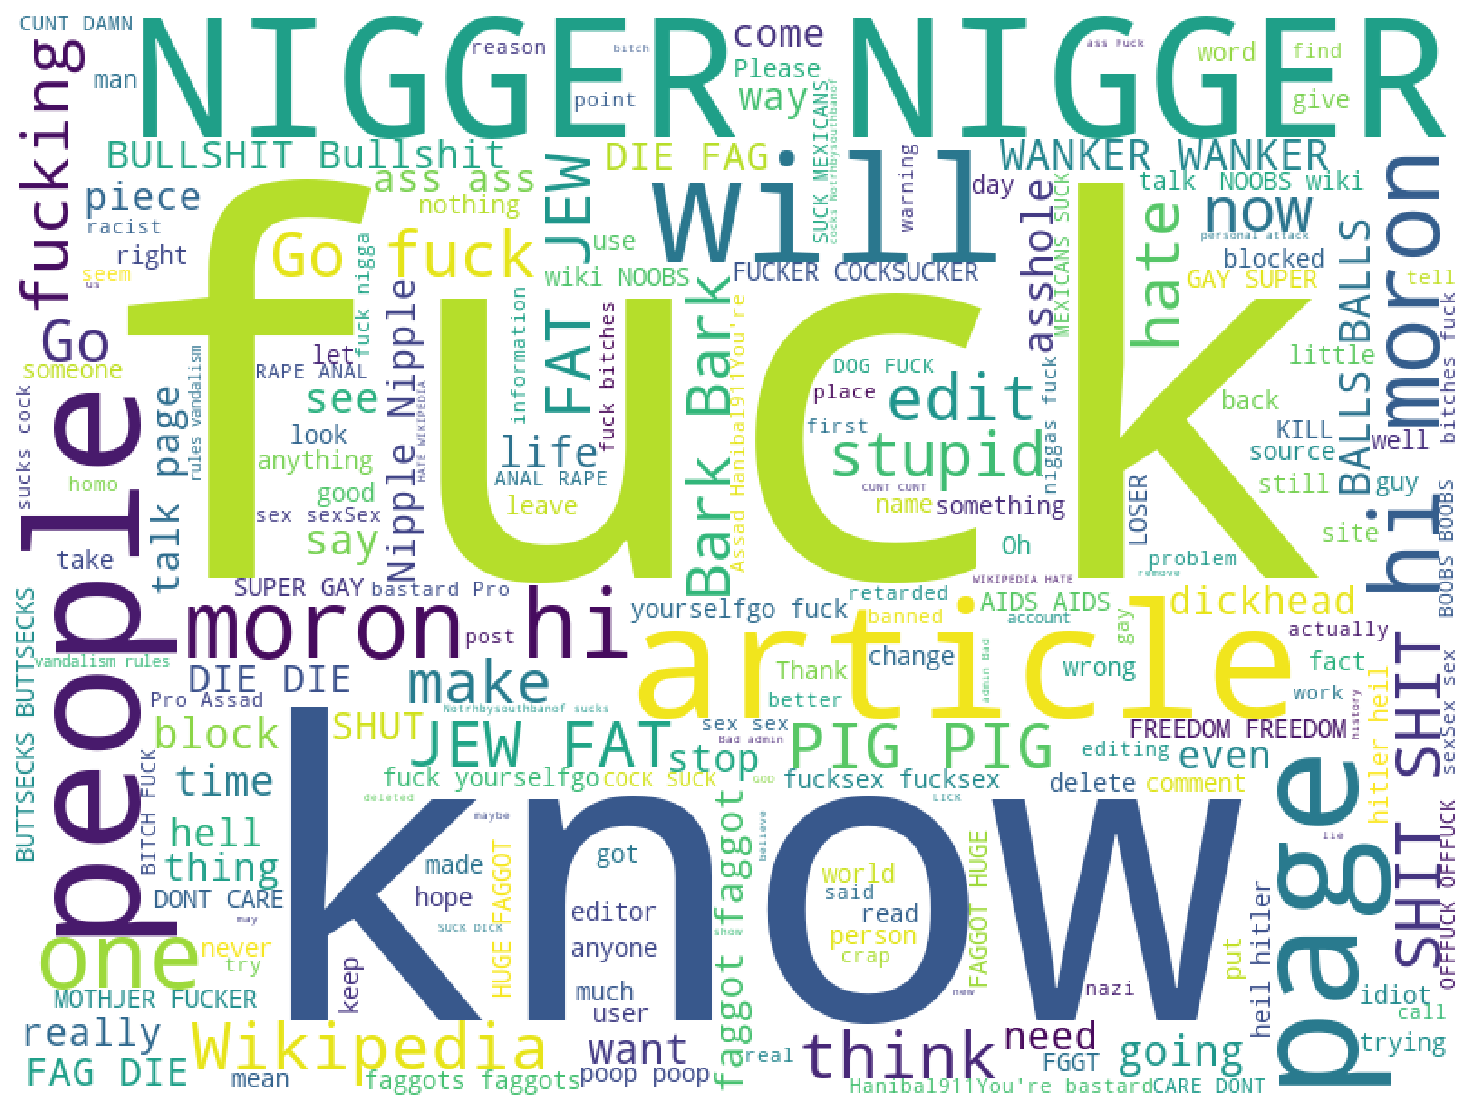

In [18]:
# toxic = True인 것에 대해 wordcloud를 그려본다.
subset = train[train.toxic == 1]
text = subset.comment_text.values
wc = displayWordCloud(" ".join(text))

insult와 toxic이 양의 상관관계를 가졌으므로 wordcloud를 통해서 비교해보자.

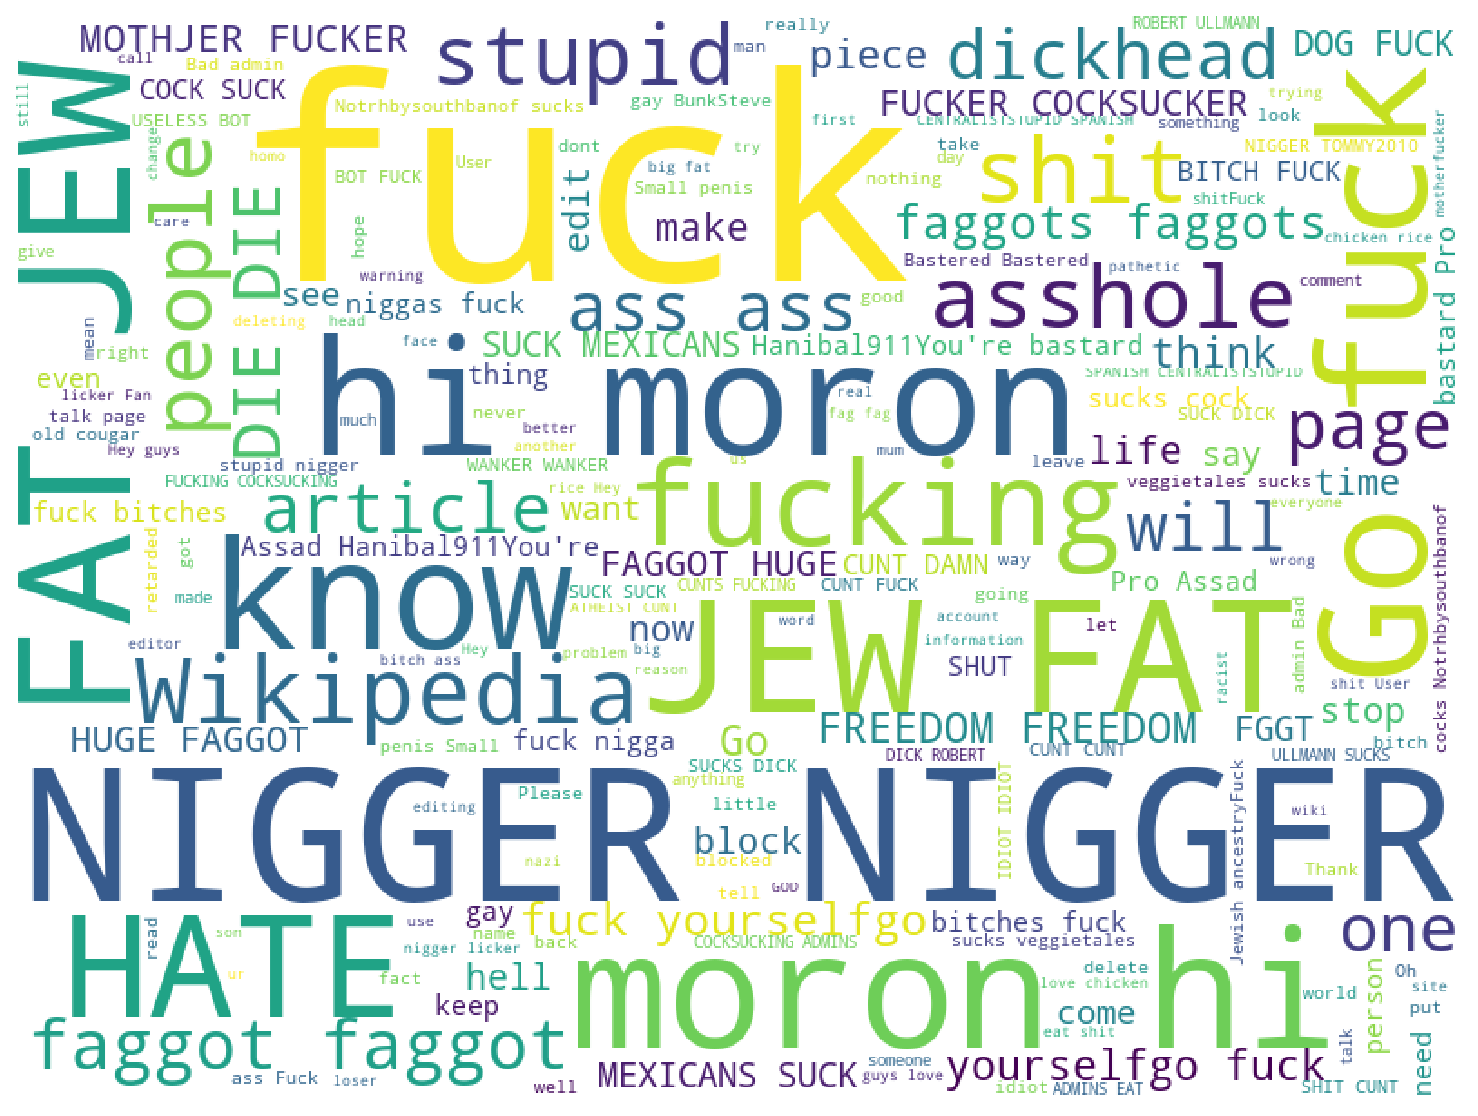

In [19]:
# insult = True인 것에 대해 wordcloud를 그려본다.
subset = train[train.insult == 1]
text = subset.comment_text.values
wc = displayWordCloud(" ".join(text))

obscene와 insult도 양의 상관관계를 가졌으므로 wordcloud를 통해 살펴보자.

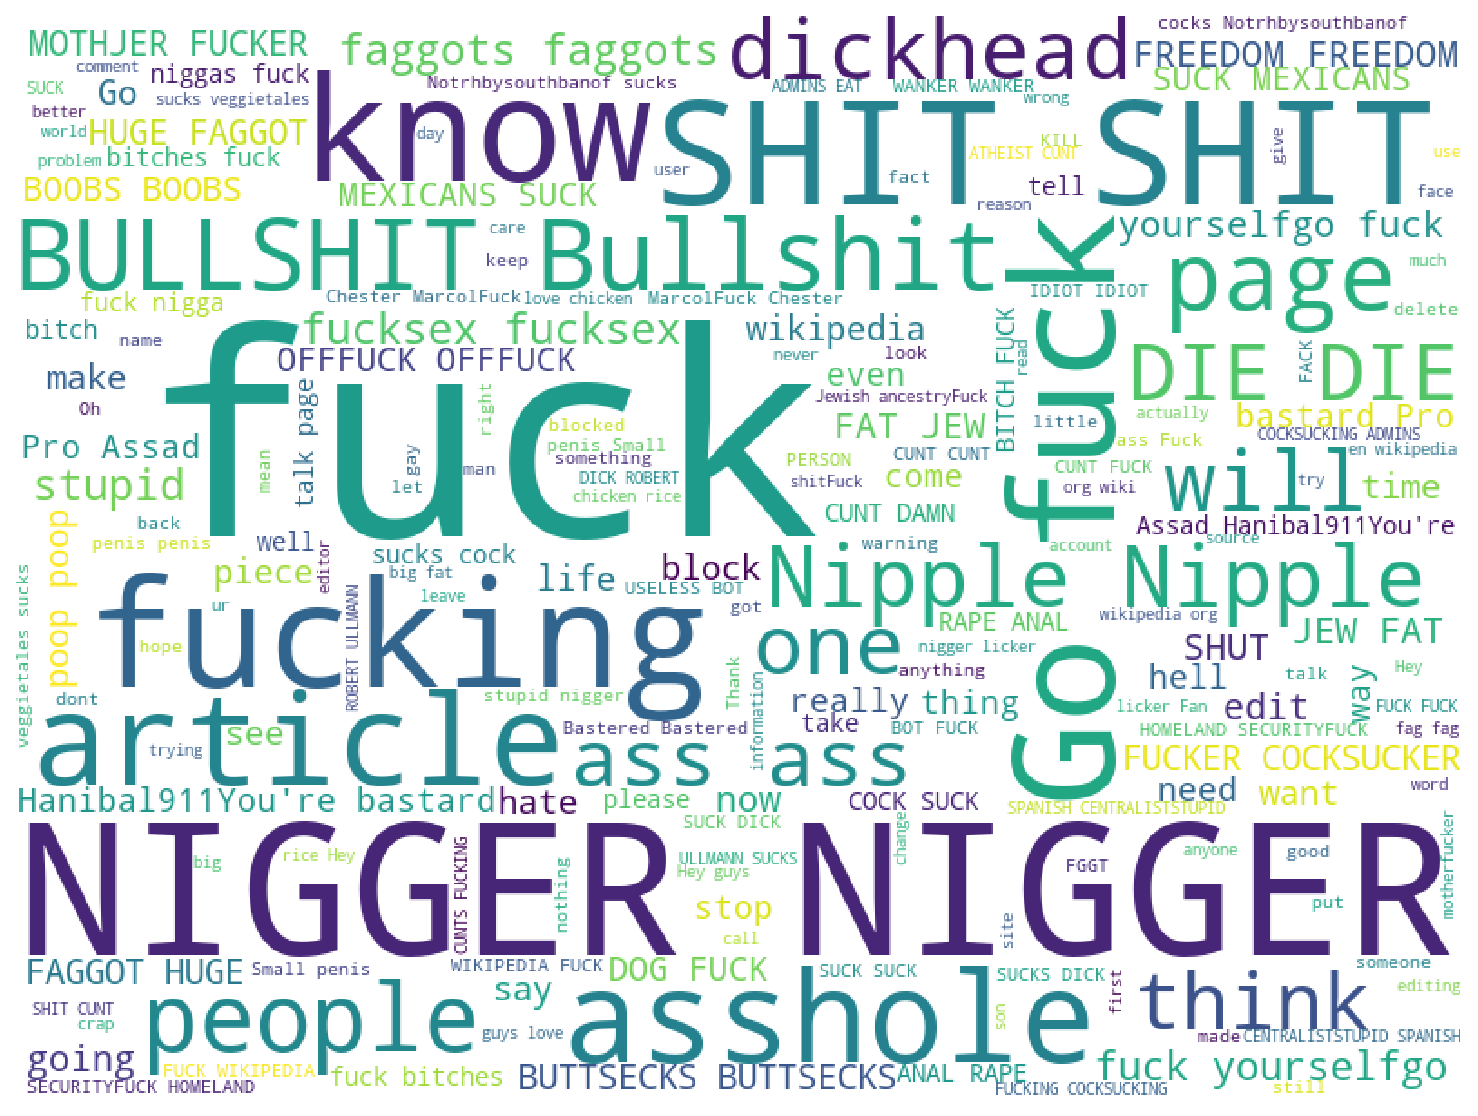

In [20]:
# obscene = True인 것에 대해 wordcloud를 그려본다.
subset = train[train.obscene == 1]
text = subset.comment_text.values
wc = displayWordCloud(" ".join(text))

In [21]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True


In [22]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)

In [23]:
# 각 댓글의 문장 수
train['count_sent'] = train['comment_text'].apply(lambda x: len(re.findall("\n",str(x)))+1)
# 각 댓글의 단어 수
train['count_word'] = train['comment_text'].apply(lambda x: len(str(x).split()))

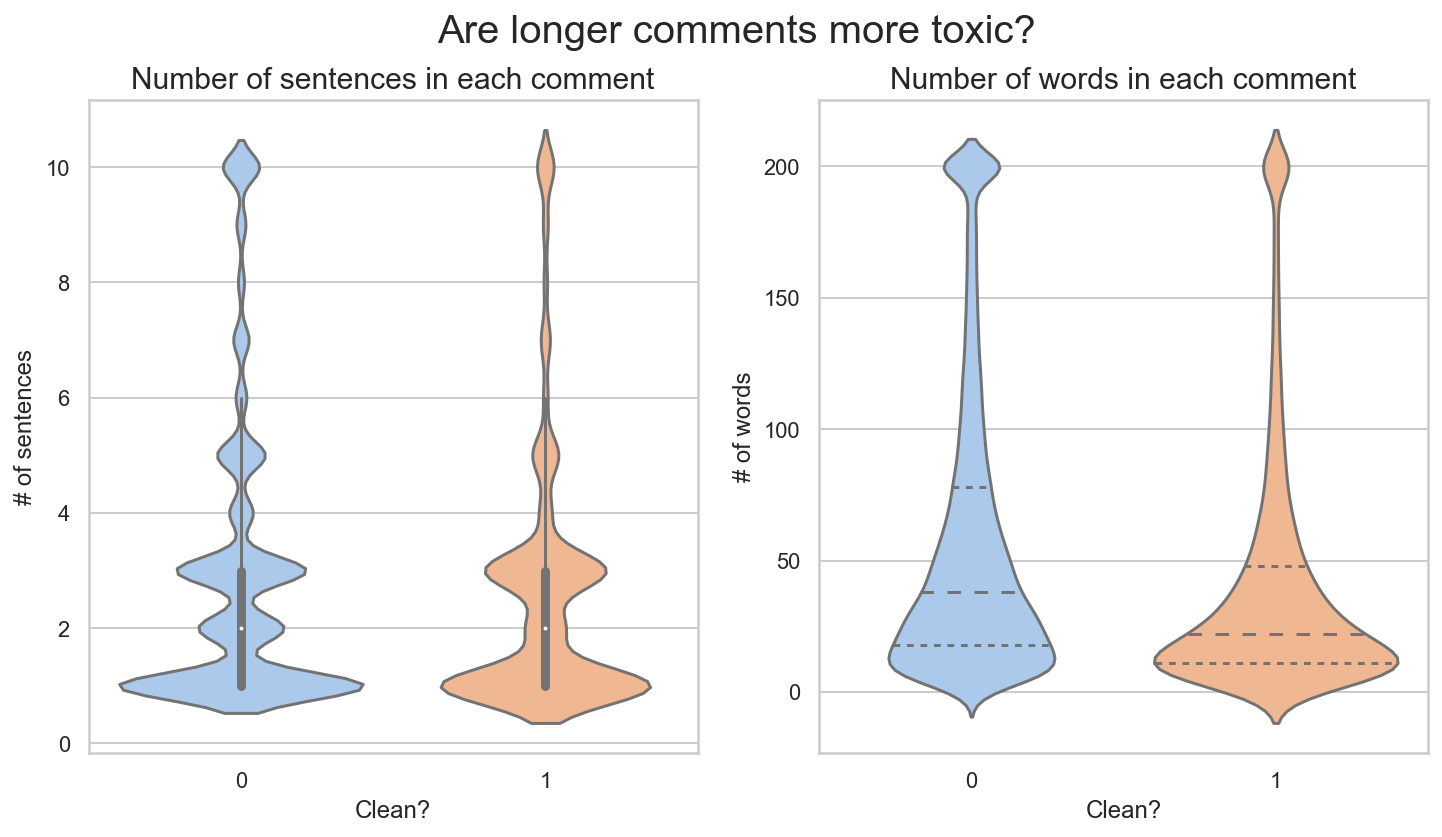

In [24]:
# 문장의 길이가 toxic과의 연관이 있는지

# 분포도가 너무 넓으면 그래프 보기가 힘드므로 10문장이상은 10개, 200단어 이상은 200개로 고정한다.
train['count_sent'].loc[train['count_sent'] > 10] = 10 
train['count_word'].loc[train['count_word'] > 200] = 200

plt.figure(figsize=(12,6))

# sentences
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?", fontsize=20)
sns.violinplot(y='count_sent', x='toxic', data=train, split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)

# words
plt.subplot(122)
sns.violinplot(y='count_word', x='toxic', data=train, split=True, inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

위의 그래프를 보았을 때, 긴 문장이나 긴 단어는 독성에 크게 영향을 미치지 않는다는 것을 알 수 있다.   
(문장의 길이는 악성 댓글의 여부와 상관이 없다.)

그렇다면, 이번에는 댓글에서 고유한 단어의 개수를 파악하여 clean한 댓글과 toxic한 댓글을 비교해보도록 하자. 

In [25]:
# set를 이용한 고유 단어수
train['count_unique_word'] = train["comment_text"].apply(lambda x: len(set(str(x).split()))) 
train['count_unique_word'].loc[train['count_unique_word'] > 200] = 200
# 각 댓글에서 고유한 단어 비율
train['word_unique_percent'] = train['count_unique_word'] * 100 / train['count_word']

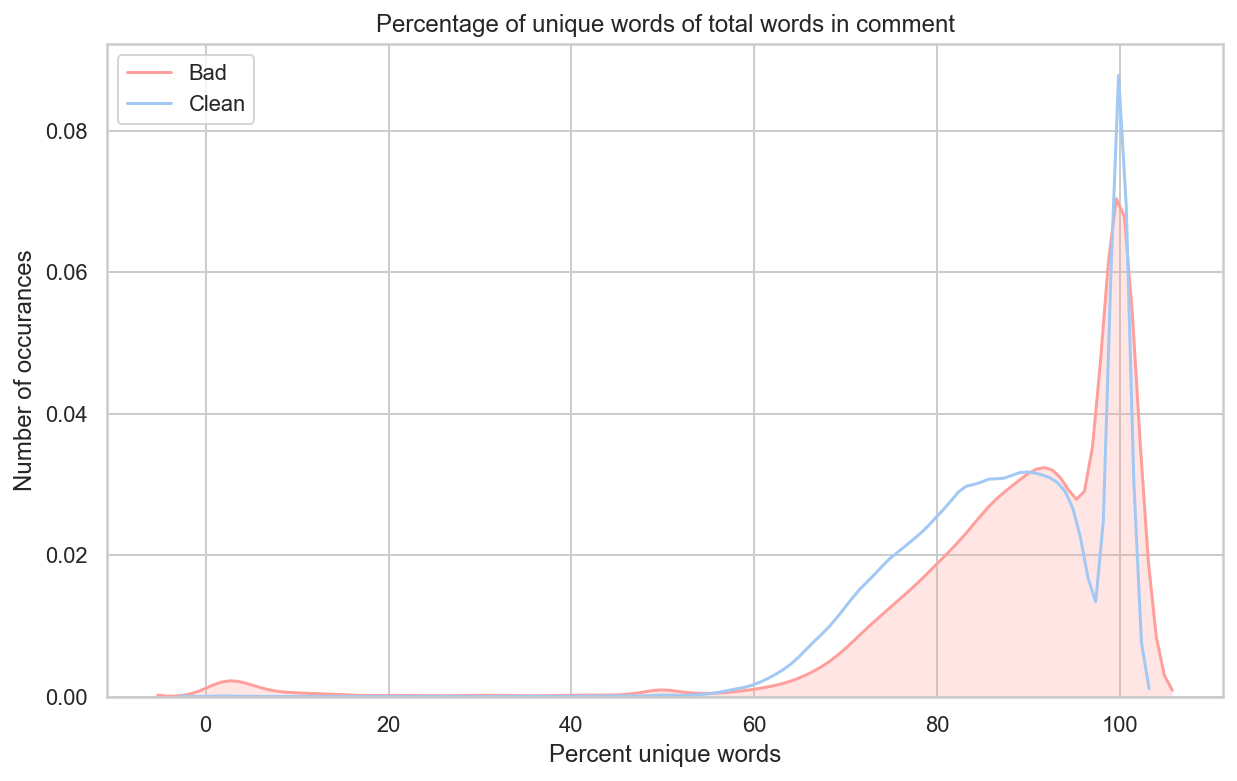

In [26]:
plt.figure(figsize=(10,6))
plt.title("Percentage of unique words of total words in comment")

ax = sns.kdeplot(train[train.clean == False].word_unique_percent, label="Bad", shade=True, color='r')
ax2 = sns.kdeplot(train[train.clean == True].word_unique_percent, label="Clean")

plt.legend()

plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)

plt.show()

붉은 색 선이 Bad 이고, 파란 선이 Clean한 댓글이다.  
위의 그래프를 살펴보았을 때, 0~20개 사이의 고유 단어를 사용한 언어의 경우 Bad한 댓글일 확률이 다소 있는 편이다.

In [27]:
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

def preprocessing_to_comment(raw_comment):
    # 1. html 제거
    review_text = BeautifulSoup(raw_comment, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 어간 추출
    stemming_words = [stemmer.stem(w) for w in words]
    # 5. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return (' '.join(stemming_words))

In [28]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    workers = kwargs.pop('workers')
    pool = Pool(processes=workers)
    
    result = pool.map(_apply_df, [(d, func, kwargs)
                                 for d in np.array_split(df, workers)])
    pool.close()
    
    return pd.concat(list(result))

In [29]:
%time finished = apply_by_multiprocessing(train['comment_text'], preprocessing_to_comment, workers=4)

CPU times: user 235 ms, sys: 221 ms, total: 456 ms
Wall time: 1min 2s


In [30]:
stops = set(stopwords.words('english'))

In [32]:
def count_stopwords(corpus):
    count = 0
    
    tmp = corpus.split(' ')
    for text in tmp:
        if text in stops:
            count += 1
    return count        

In [35]:
# 일반적으로 불용어는 의미가 없기 때문에 제거하는 대상이 되기 마련인데, 이러한 불용어의 개수와 악성댓글의 여부를 확인해보도록 하자. 
train['count_stopwords'] = finished.apply(lambda x : count_stopwords(x))

In [37]:
train['percentage_stopwords'] = train['count_stopwords'] * 100 / train['count_word']

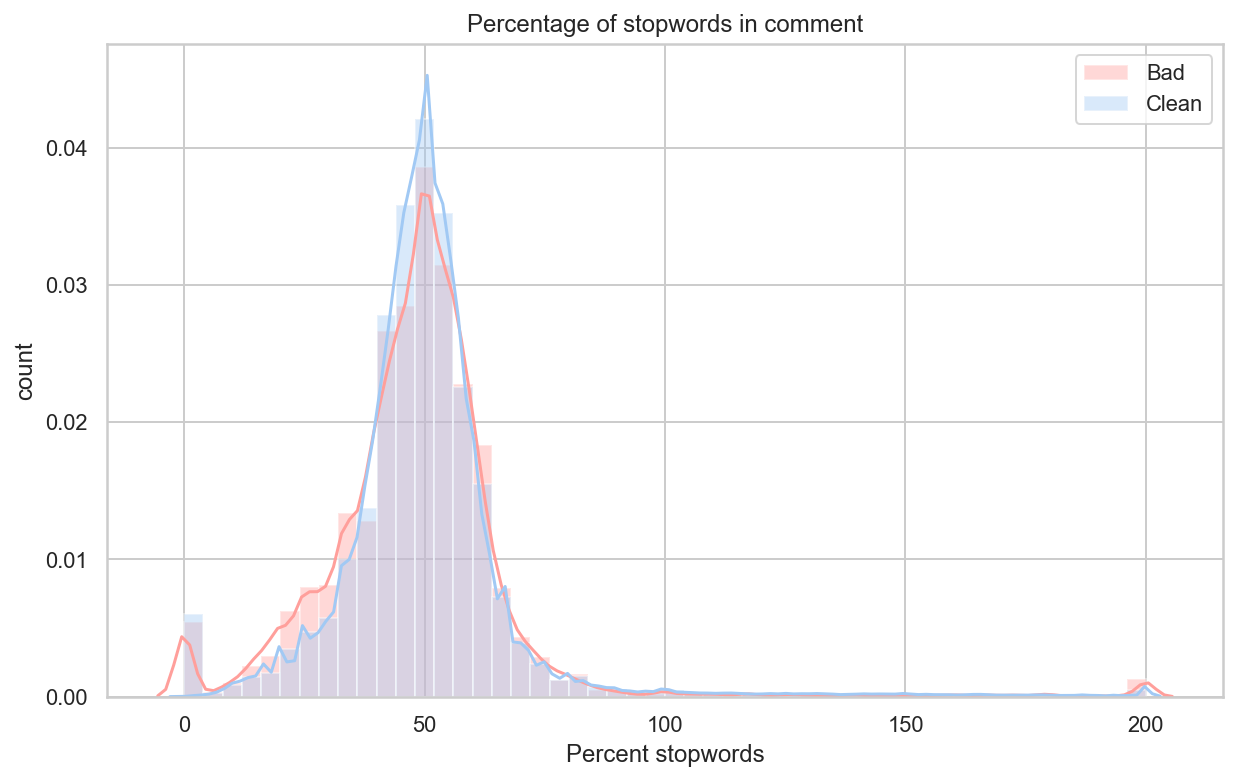

In [62]:
# 불용어와 악성댓글의 여부를 파악하기 위해 그래프를 그려봅시다.
train['percentage_stopwords'].loc[train['percentage_stopwords'] > 200] = 200

plt.figure(figsize=(10,6))
plt.title("Percentage of stopwords in comment")

ax = sns.distplot(train[train.clean == False].percentage_stopwords, label="Bad", color='r')
ax2 = sns.distplot(train[train.clean == True].percentage_stopwords, label="Clean")

plt.legend()

plt.ylabel('count', fontsize=12)
plt.xlabel('Percent stopwords', fontsize=12)

plt.show()

불용어가 하나도 없을 경우(0개일 경우) 욕설일 가능성이 선플에 비해서 조금 있다는 것을 알 수 있다.  
불용어가 하나도 없을 경우(0개일 경우) 그래프를 통해 선플과 악플의 비율을 비교해보자.

In [59]:
good = len(train[train['percentage_stopwords'] < 50]['toxic'] == False)
bad = len(train[train['count_stopwords'] < 50]['toxic'] == True)

In [60]:
print('good : bad = ', good, ' : ', bad)

good : bad =  79747  :  131052


댓글에서 불용어의 개수가 50퍼센트 미만일 때 악플일 확률이 2배 가량 높은 것으로 확인되었다. 